### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import ceil
from Ambrosia import pre_process_image
from skimage import io

In [2]:
# get path of image to ingest
wd = os.getcwd()
wd = "F:\\Beetle_classification_deep_data\\Coccotypes_dactyliperda\\Vial_16296\\Subset_5"
# image_name = "IMG_0269_clean.JPG"
# image_name = "IMG_0046.JPG"
# image_name = "IMG_0014.JPG"
image_name = "IMG_0005.JPG"
wd_image_path =  wd+"/"+ image_name
image_path = wd_image_path

# Initialize compound image

In [3]:
# Initialize image
ppi = pre_process_image(image_dir = image_path, manual_thresh_buffer=0.15)

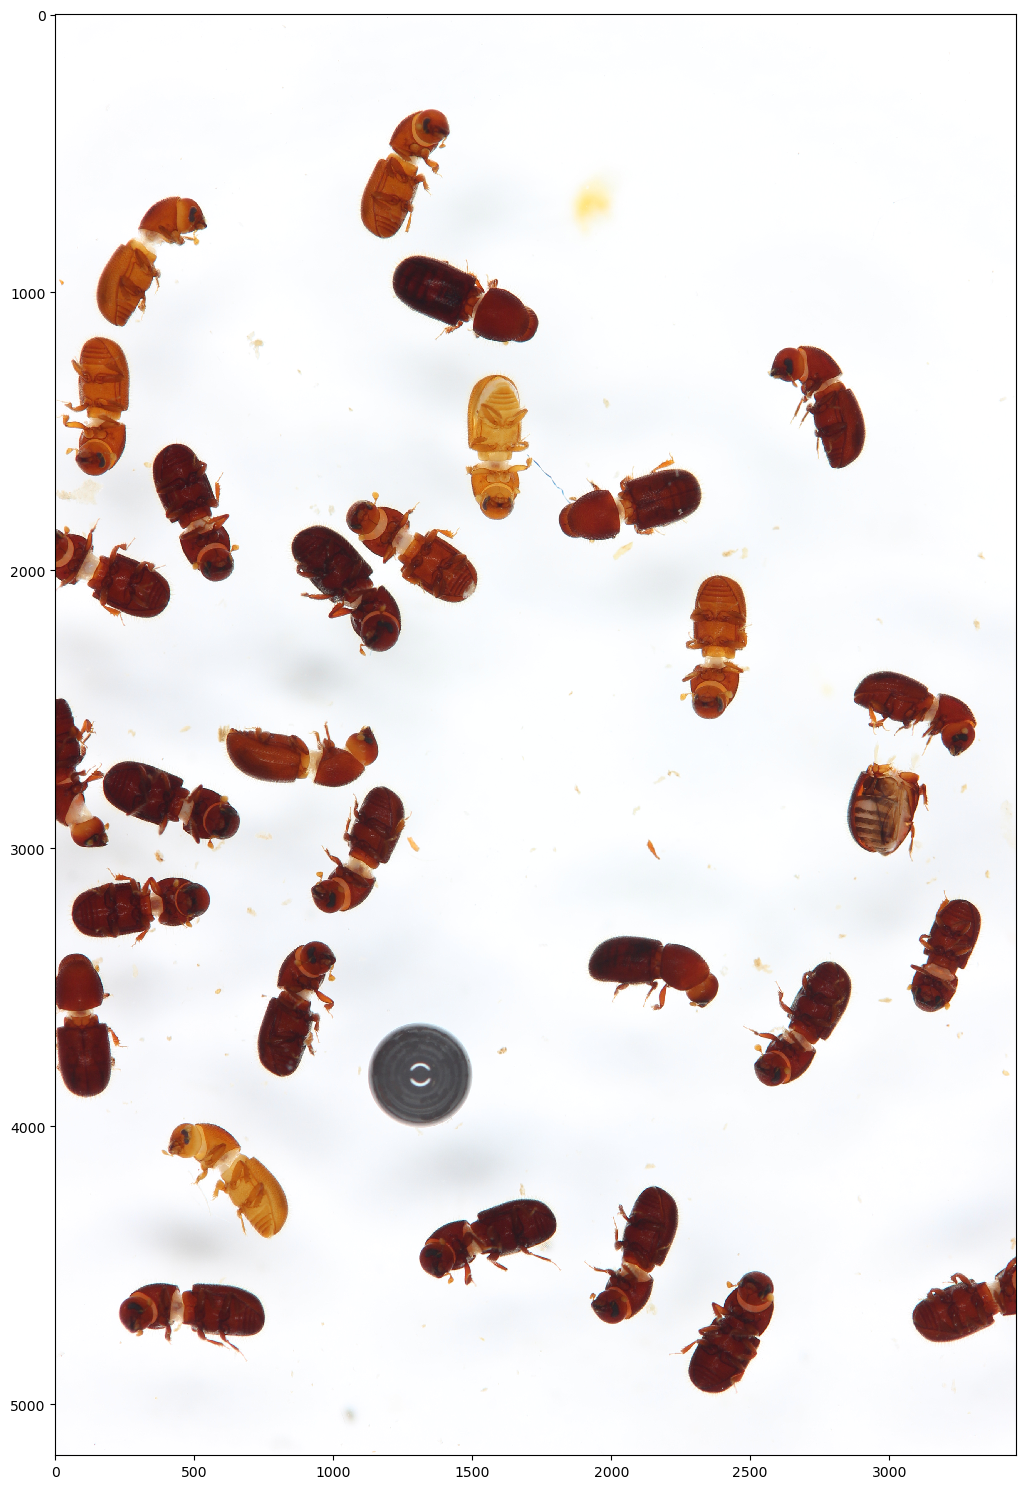

In [4]:
# input image
plt.figure(figsize=(15, 15))
io.imshow(ppi.image)
plt.show()

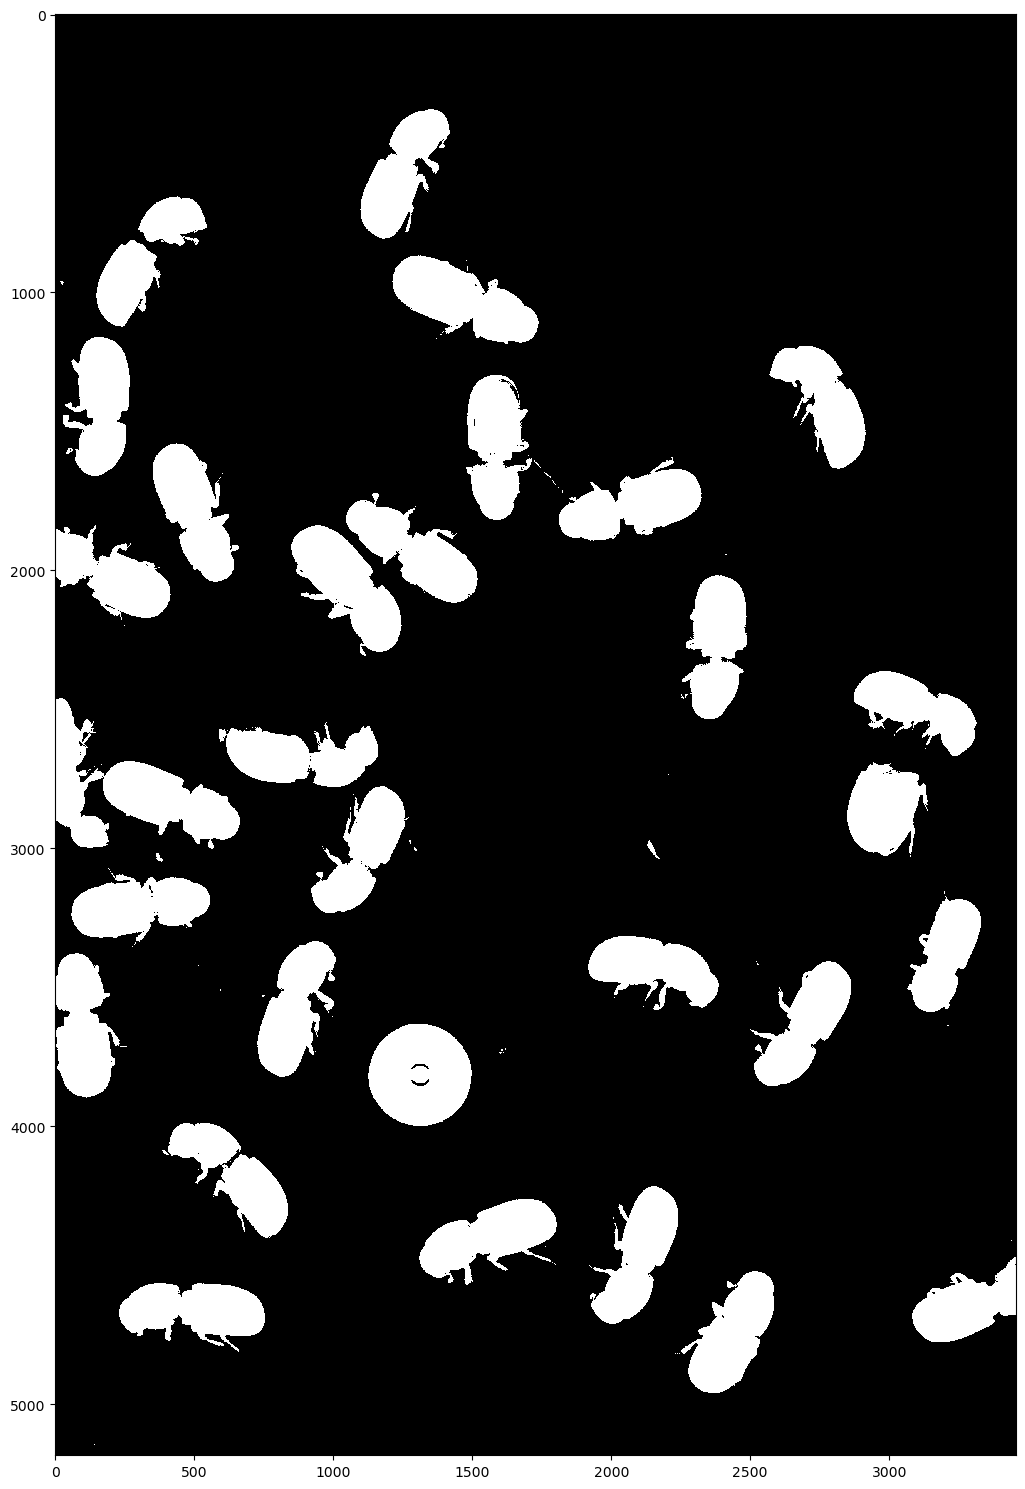

In [5]:
# input image
plt.figure(figsize=(15, 15))
io.imshow(ppi.inv_bw_image)
plt.show()

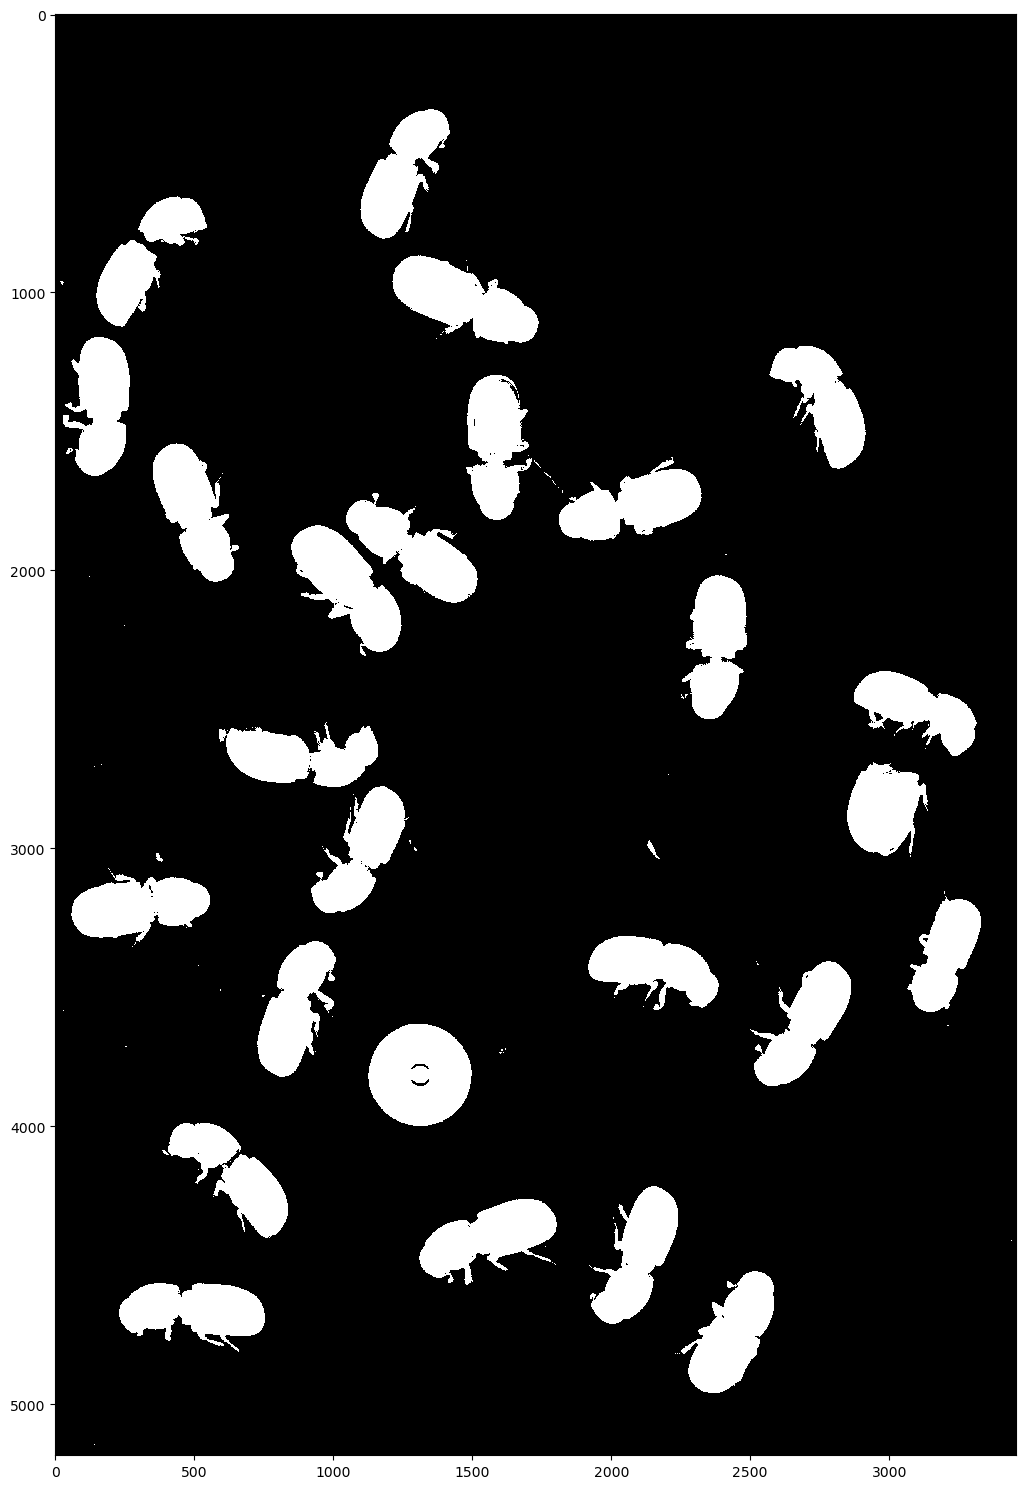

In [6]:
# input image
plt.figure(figsize=(15, 15))
io.imshow(ppi.clear_inv_bw_image)
plt.show()

# Segment compound image into smaller images

In [7]:
# apply segmentation of blobs in image
ppi.segment(cluster_num=2, image_edge_buffer=50)

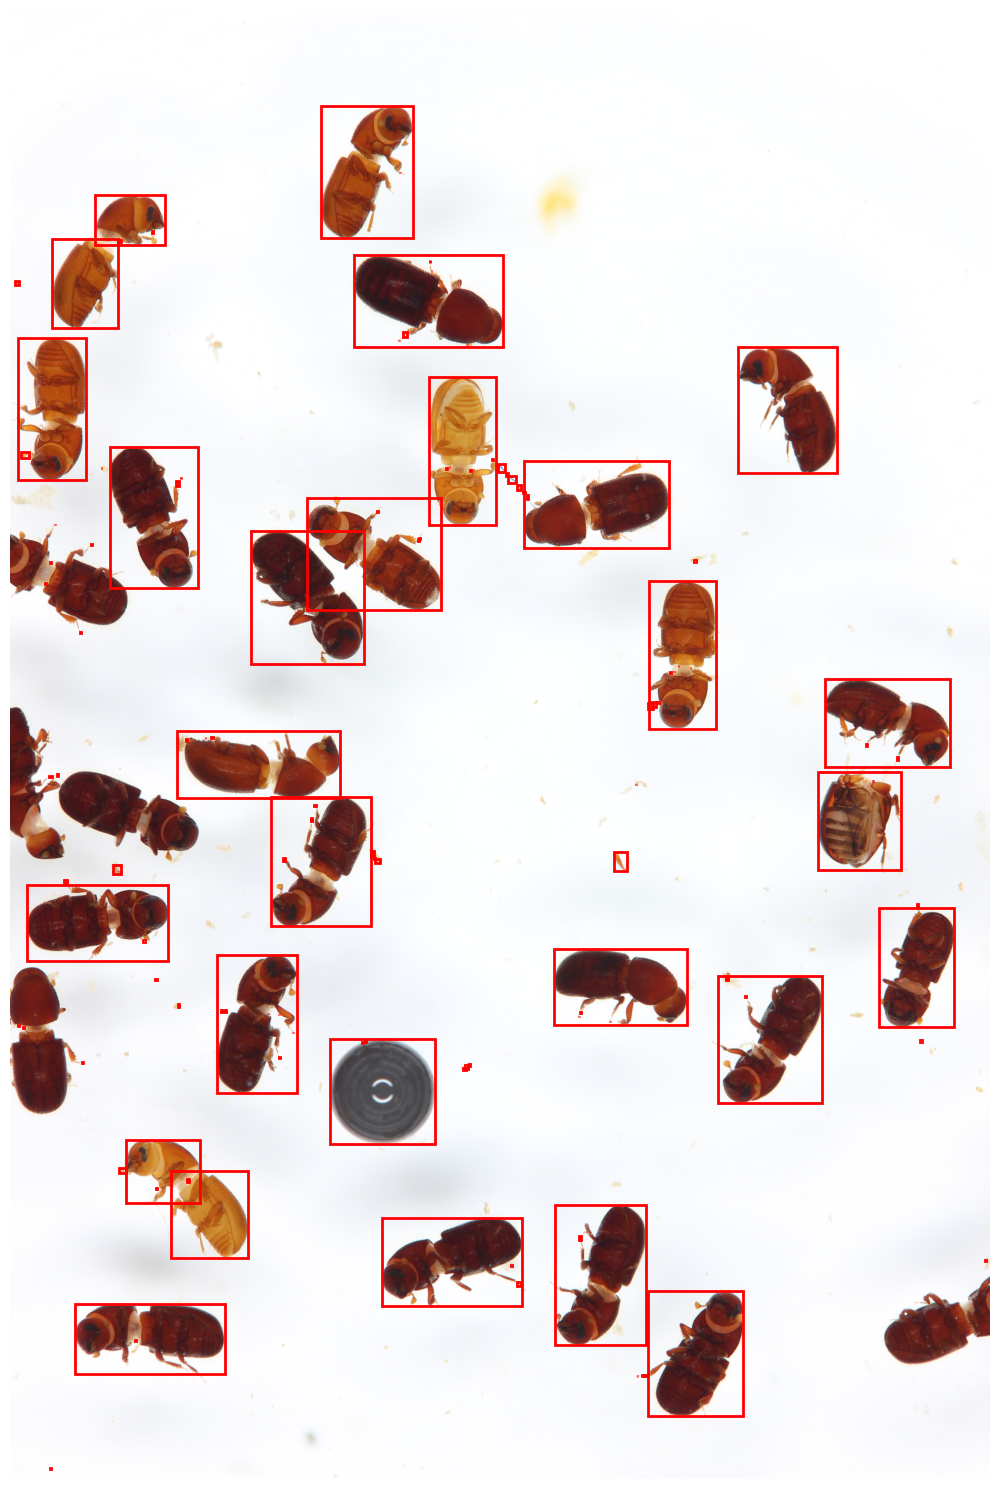

In [8]:
# plot boxes that will be used to extract 
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(ppi.image)
coord_df = ppi.image_properties_df
for i in range(len(coord_df)):
    data_i = coord_df.iloc[i]
    minr = data_i['bbox-0']
    minc = data_i['bbox-1']
    maxr = data_i['bbox-2']
    maxc =data_i['bbox-3']
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [9]:
# all artefacts dataframe
ppi.image_properties_df

centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  orientation  \
0     571.173796  1247.637815     342    1098     808    1420    -0.462641   
1     576.000000  1374.500000     576    1374     577    1376     1.570796   
2     743.126568   423.406033     656     299     833     547    -1.376875   
3     785.166667   500.833333     782     500     788     503     0.055329   
4     793.000000   500.000000     793     500     794     501     0.785398   
..           ...          ...     ...     ...     ...     ...          ...   
147  4817.900000  2231.900000    4817    2230    4820    2235    -1.436613   
148  4817.571429  2239.714286    4817    2238    4819    2242    -1.425068   
149  4817.500000  2246.000000    4817    2245    4819    2248     1.570796   
150  4820.400000  2210.800000    4820    2210    4822    2213    -1.249046   
151  5145.333333   142.333333    5145     142    5147     144     0.785398   

     axis_major_length  axis_minor_length   area  area_filled  kmeans_label  
0           545.653254         197.796476  77361        77361             1  
1             2.000000           0.000000      2            2             0  
2           237.863904         166.801444  29968        29972             1  
3             6.297144           2.730768     12           12             0  
4             0.000000           0.000000      1            1             0  
..                 ...                ...    ...          ...           ...  
147           4.569200           2.757247     10           10             0  
148           4.155375           1.905471      7            7             0  
149           3.265986           2.000000      6            6             0  
150           3.098387           1.788854      5            5             0  
151           2.309401           1.333333      3            3             0  

[152 rows x 12 columns]

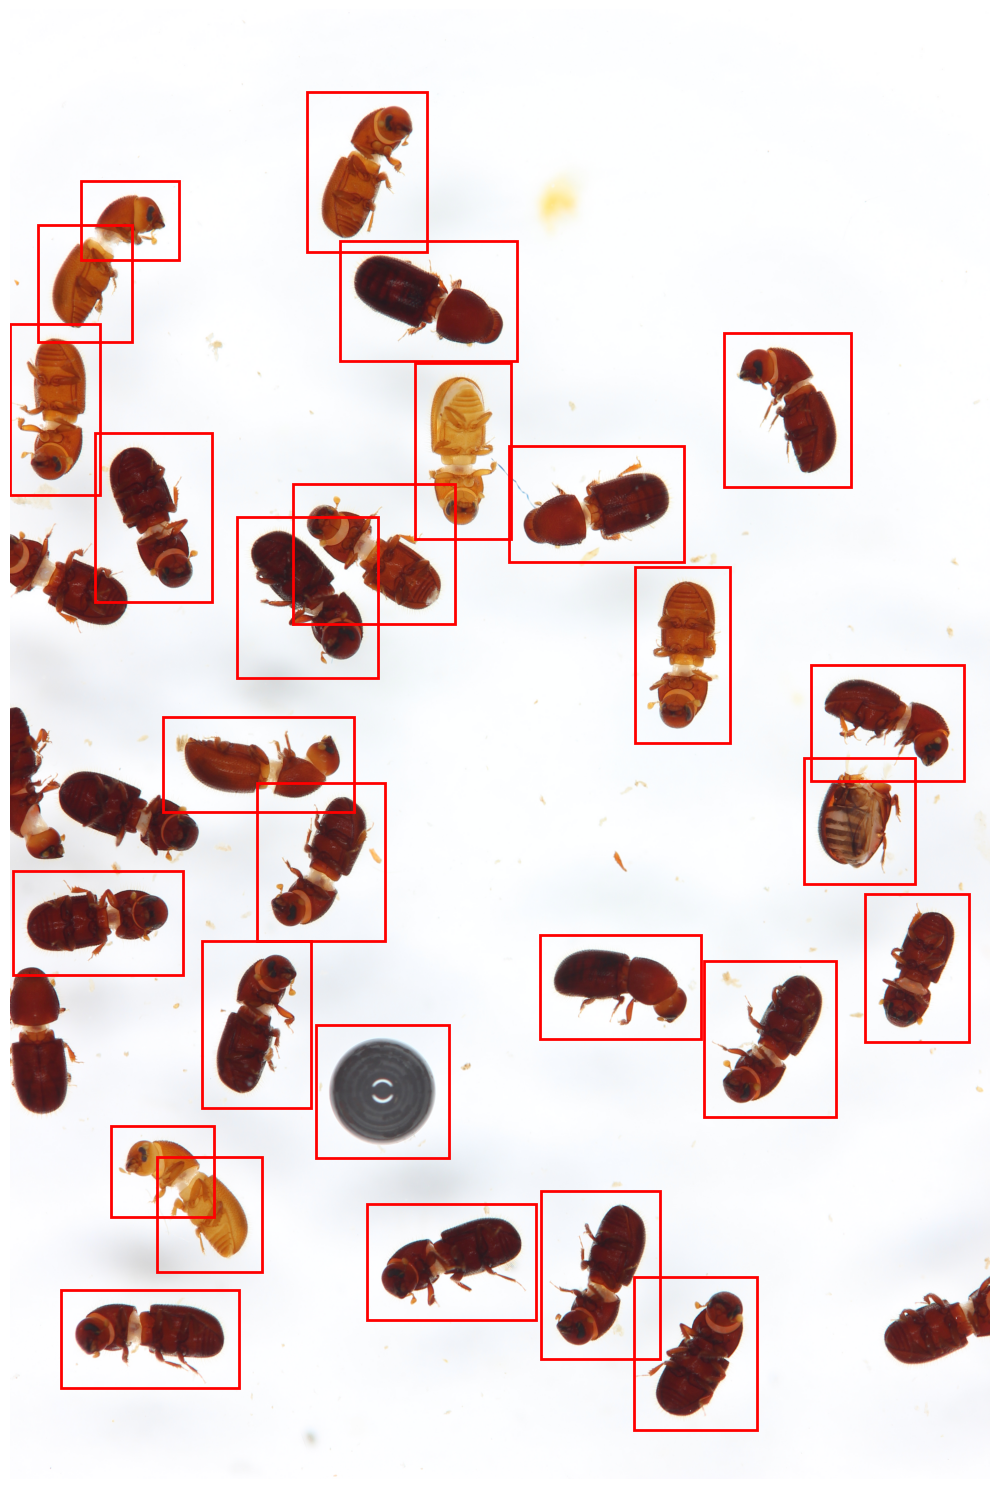

In [10]:
# plot boxes that will be used to extract 
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(ppi.image)
coord_df = ppi.image_selected_df
for i in range(len(coord_df)):
    data_i = coord_df.iloc[i]
    minr = data_i['bbox-0']
    minc = data_i['bbox-1']
    maxr = data_i['bbox-2']
    maxc =data_i['bbox-3']
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [11]:
ppi.image_selected_df

centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  orientation  \
0    571.173796  1247.637815     292    1048     858    1470    -0.462641   
1    743.126568   423.406033     606     249     883     597    -1.376875   
2    965.572119   255.107972     761      99    1175     430    -0.395553   
3   1029.939019  1465.640905     818    1163    1240    1789     1.175123   
4   1406.165224   165.605592    1111       0    1712     318    -0.042519   
5   1393.952813  2768.137933    1143    2516    1686    2965     0.512631   
6   1549.559950  1583.831079    1247    1428    1870    1765     0.021279   
7   1786.257347   499.642903    1495     301    2092     711     0.387453   
8   1766.752497  2079.601183    1542    1761    1949    2375    -1.302900   
9   1931.901447  1291.990626    1673     997    2168    1570     0.970029   
10  2057.837150  1051.873104    1790     800    2359    1297     0.685331   
11  2268.243810  2380.470787    1968    2204    2588    2540    -0.088486   
12  2498.884757  3099.687529    2313    2823    2721    3364     1.165048   
13  2670.922569   881.345675    2496     539    2832    1214     1.518501   
14  2857.637004  2981.301342    2641    2799    3085    3191    -0.283271   
15  3013.552024  1105.482158    2729     871    3285    1323    -0.501956   
16  3210.263688   298.411434    3038       9    3405     608    -1.437455   
17  3381.868222  3201.702637    3121    3015    3641    3380    -0.361940   
18  3431.869987  2153.767380    3266    1867    3633    2437     1.341705   
19  3577.999813   862.135859    3285     678    3874    1061    -0.324640   
20  3634.858849  2696.620795    3358    2446    3908    2914    -0.568293   
21  3816.298685  1312.193386    3582    1077    4051    1548     1.331163   
22  4068.796103   533.863714    3939     357    4261     719     1.382908   
23  4247.926516   719.376796    4049     519    4453     889     0.623854   
24  4466.244250  2097.089735    4167    1871    4762    2293    -0.390766   
25  4401.209080  1558.042957    4212    1260    4623    1854    -1.231700   
26  4750.764326  2435.869871    4472    2201    5012    2635    -0.505172   
27  4664.283595   500.883605    4516     180    4863     806     1.524337   

    axis_major_length  axis_minor_length    area  area_filled  kmeans_label  
0          545.653254         197.796476   77361        77361             1  
1          237.863904         166.801444   29968        29972             1  
2          313.896116         190.389823   45910        45926             1  
3          587.354354         214.240668   95259        95341             1  
4          535.904018         205.977196   79613        79641             1  
5          523.653622         211.953133   76653        76674             1  
6          551.803410         205.606984   82577        82825             1  
7          555.112167         201.100717   83840        83867             1  
8          561.339649         209.639006   85894        85974             1  
9          576.610351         202.532999   84807        84891             1  
10         566.030115         220.173023   92619        92909             1  
11         558.324482         200.754089   81215        81268             1  
12         510.133981         196.003881   69696        70362             1  
13         617.577074         203.172727   82861        82979             1  
14         333.640442         267.231038   67863        68056             1  
15         549.414831         197.908971   75888        75937             1  
16         527.558468         205.854996   81369        81618             1  
17         457.857275         183.762014   63182        63343             1  
18         507.462413         210.188379   74985        75003             1  
19         541.425961         204.684803   80127        80146             1  
20         545.396632         203.015594   79192        79262             1  
21         372.372558         368.946345  105690       

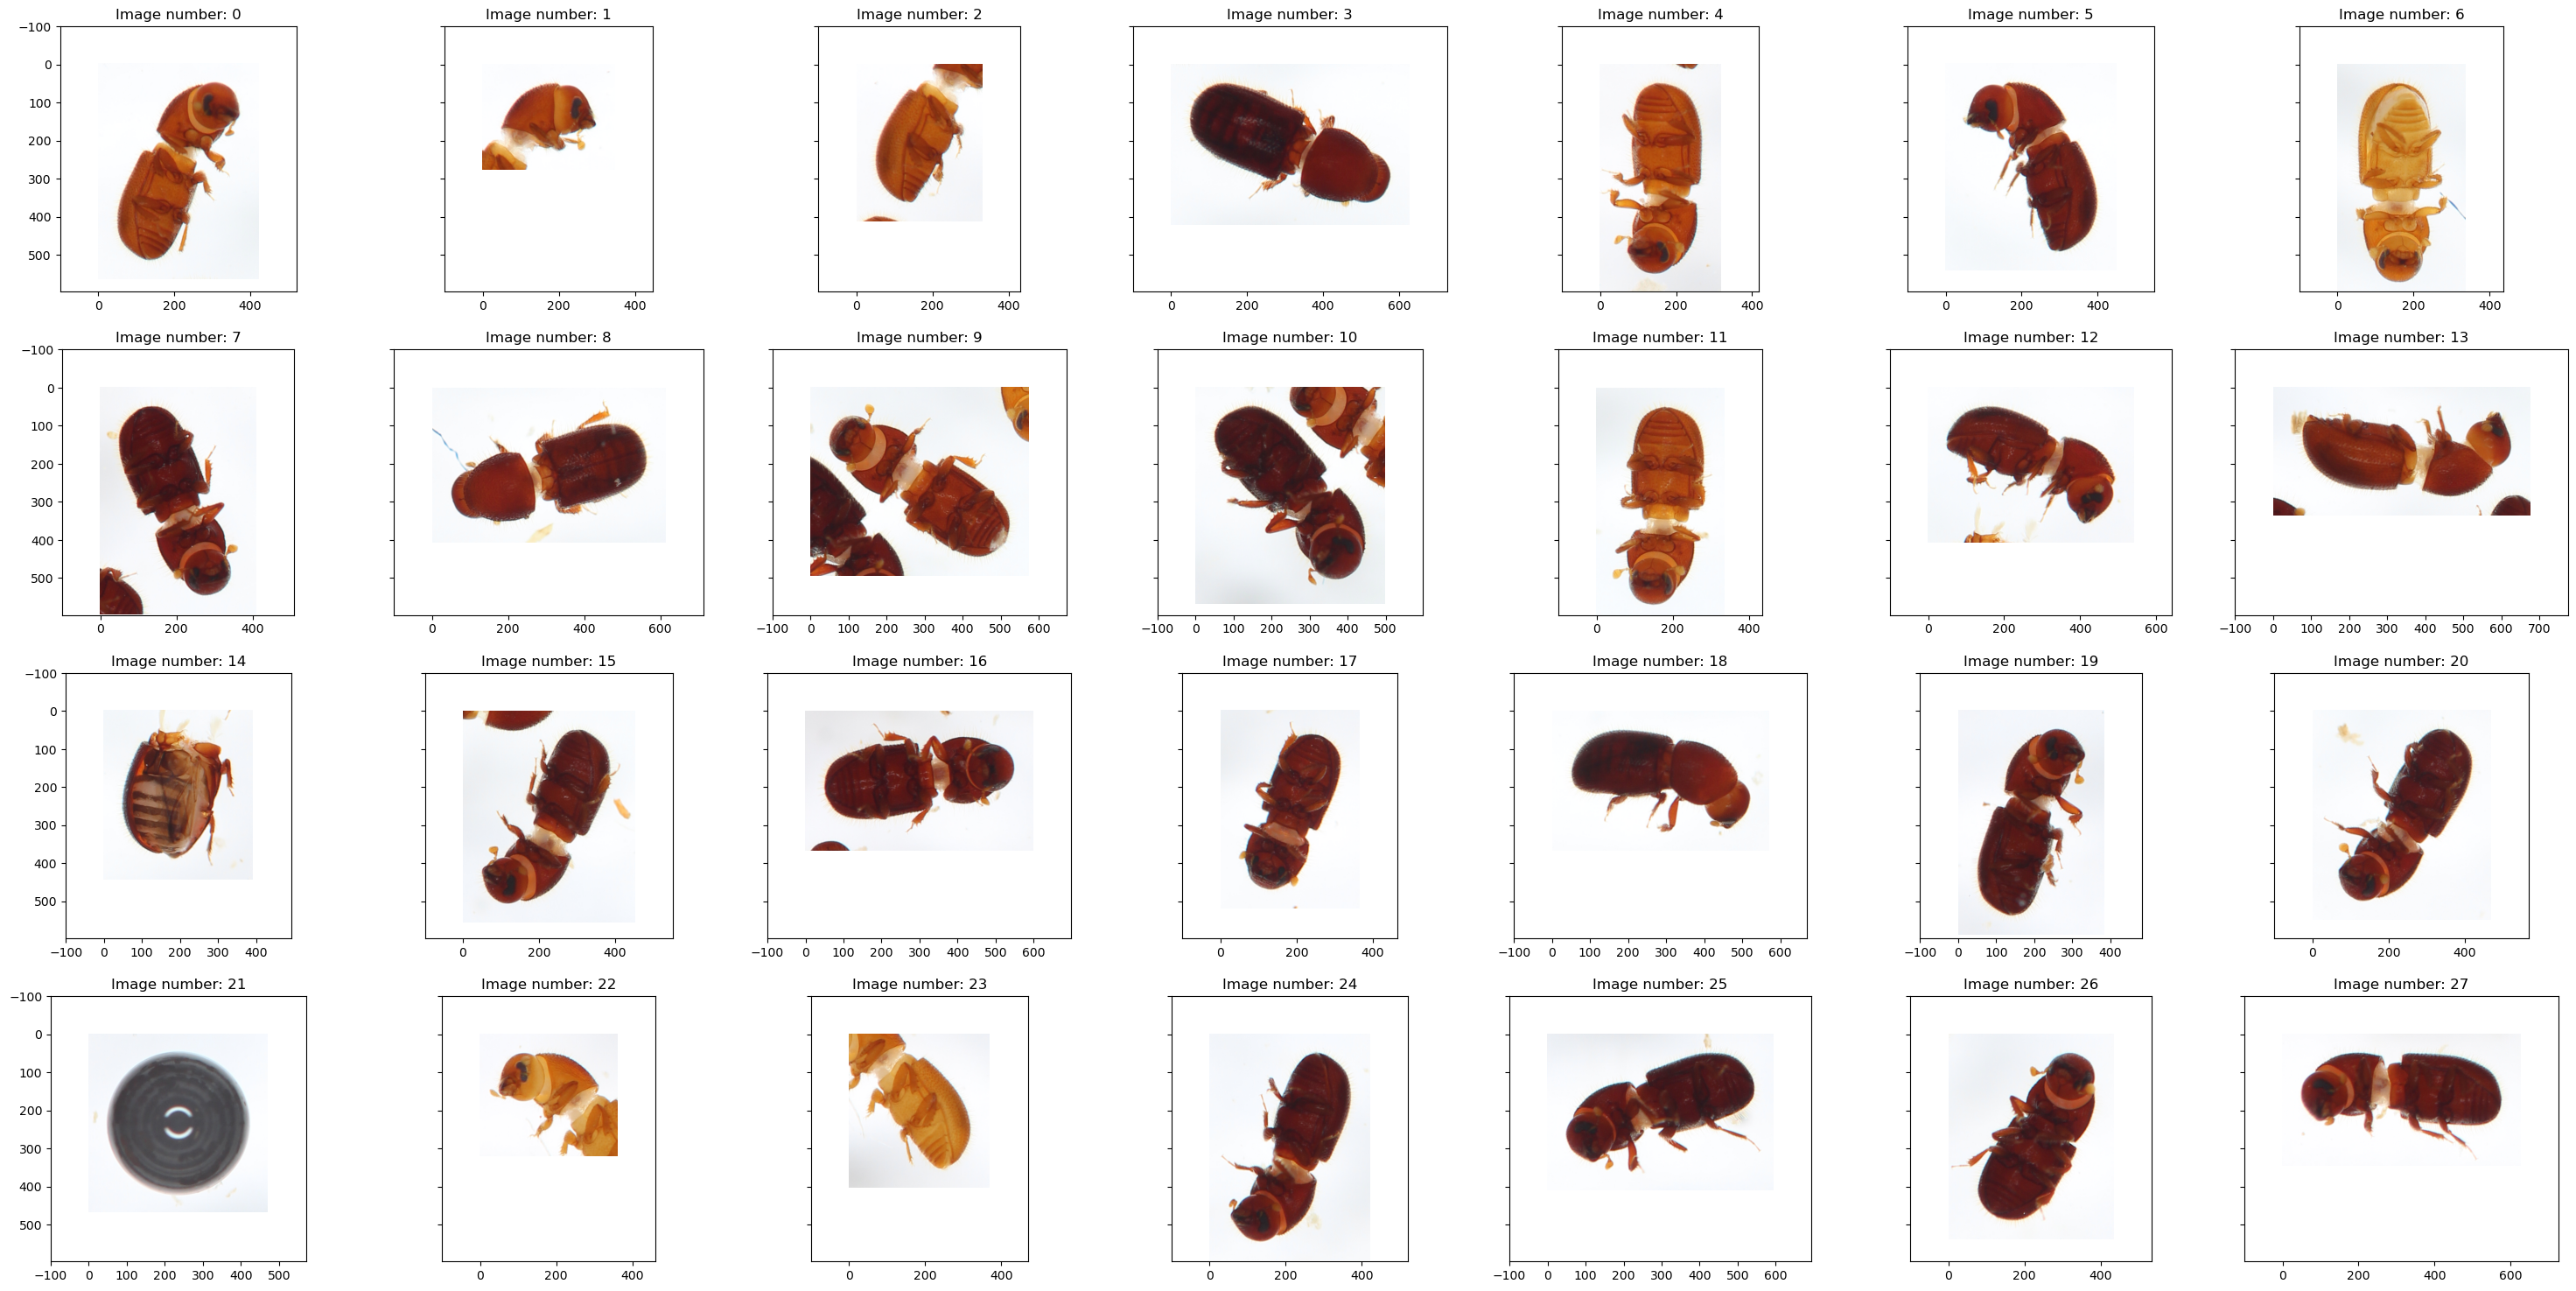

In [12]:
# define list of images
img_lst = ppi.col_image_lst

# plot pixel distribution values for all images in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
fig.set_figheight(15)
l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = axes[i][j].imshow(img_lst[l])
            axes[i][j].set_ylim(img_lst[l].shape[0]+ppi.image_edge_buffer*5, 0-ppi.image_edge_buffer*2)
            axes[i][j].set_xlim(0-ppi.image_edge_buffer*2, img_lst[l].shape[1]+ppi.image_edge_buffer*2)
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()

# Detect the outlier segment (ball bearing) from the compound image

In [13]:
# detect outlier 
ppi.detect_outlier()

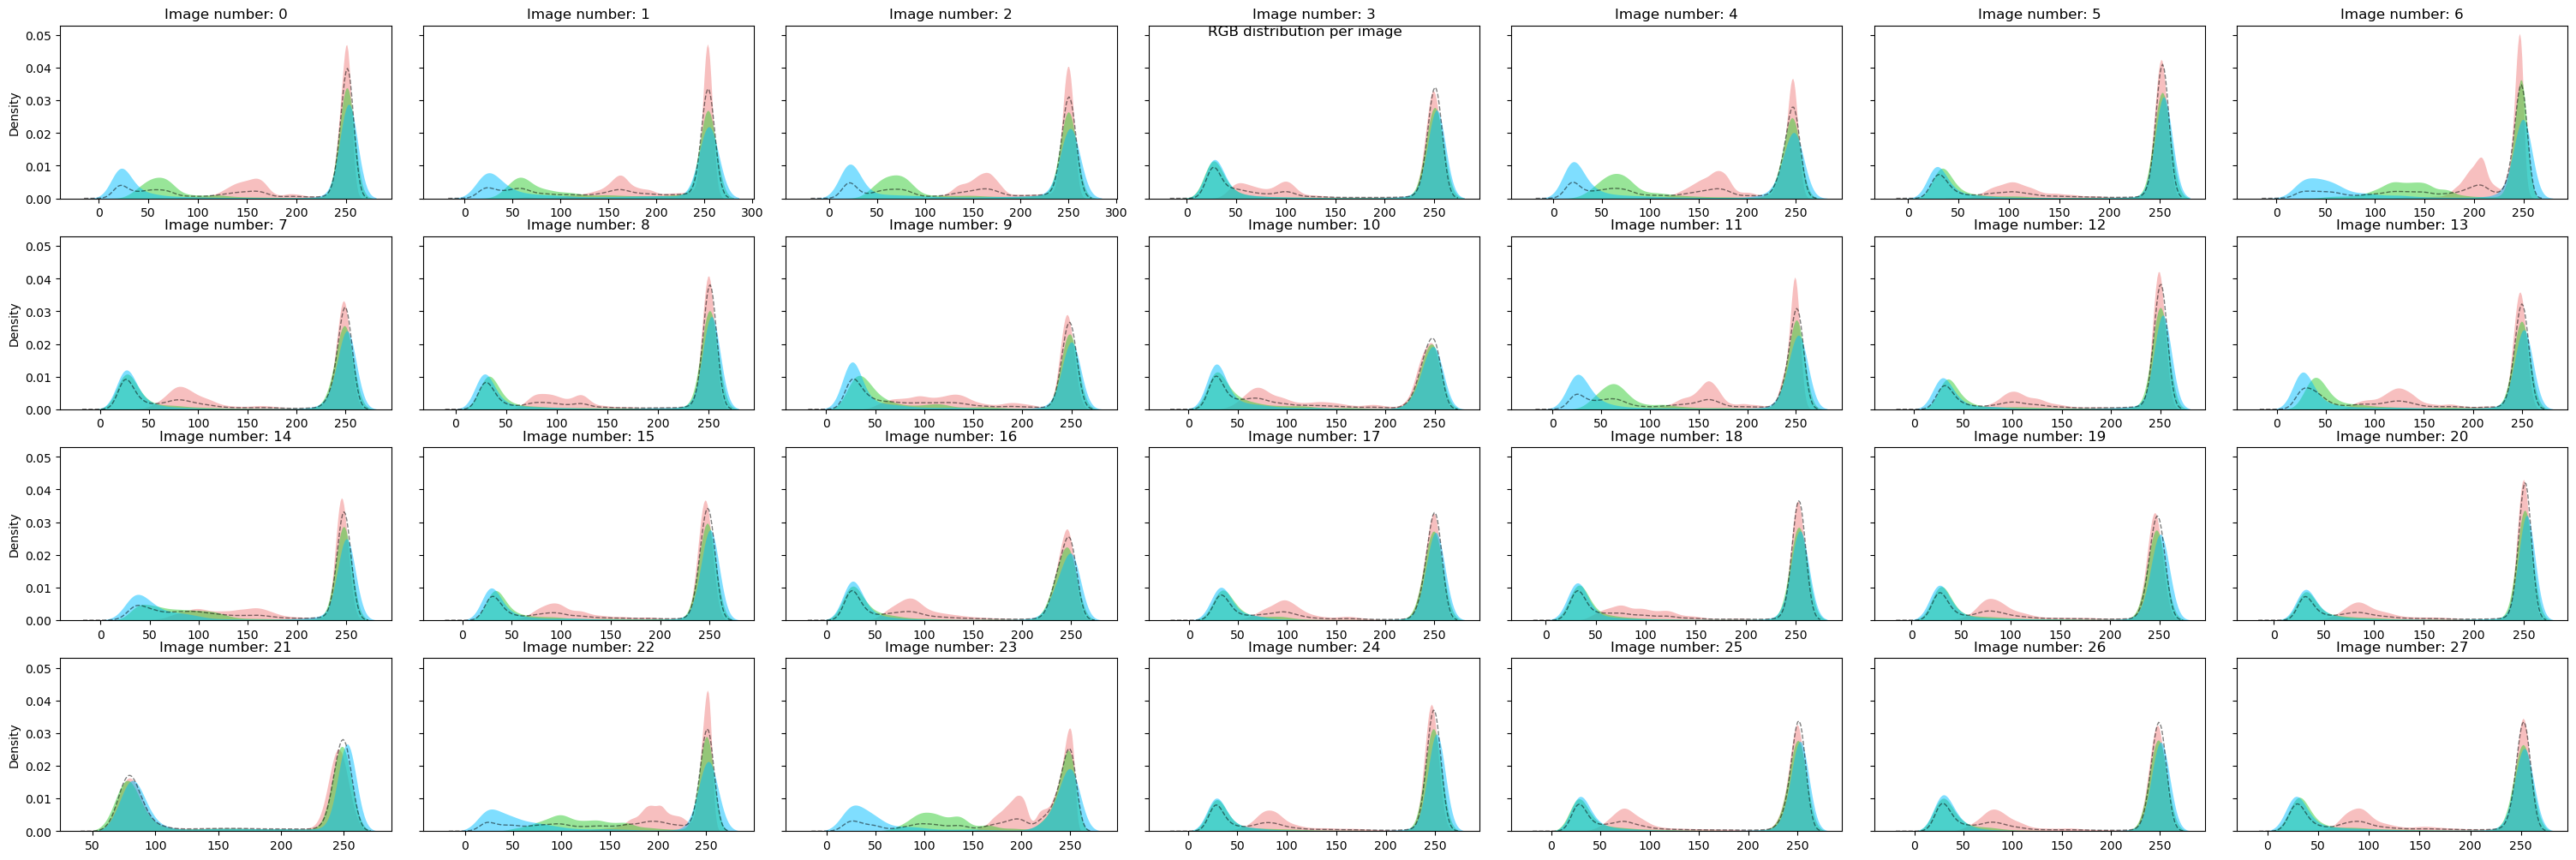

In [14]:
# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
fig.suptitle('RGB distribution per image')

# initialize lists to store data in
r_ar_lst = ppi.r_ar_lst
g_ar_lst = ppi.g_ar_lst
b_ar_lst = ppi.b_ar_lst
all_ar_lst = ppi.all_ar_lst

l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = sns.kdeplot(ax=axes[i][j], data=r_ar_lst[l], color='lightcoral', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=g_ar_lst[l], color='limegreen', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=b_ar_lst[l], color='deepskyblue', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=all_ar_lst[l], color='black', fill=False, alpha=.5, linewidth=1, linestyle='--')
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()
# fig.figure.savefig("Image_RGB_density_distribution.png")

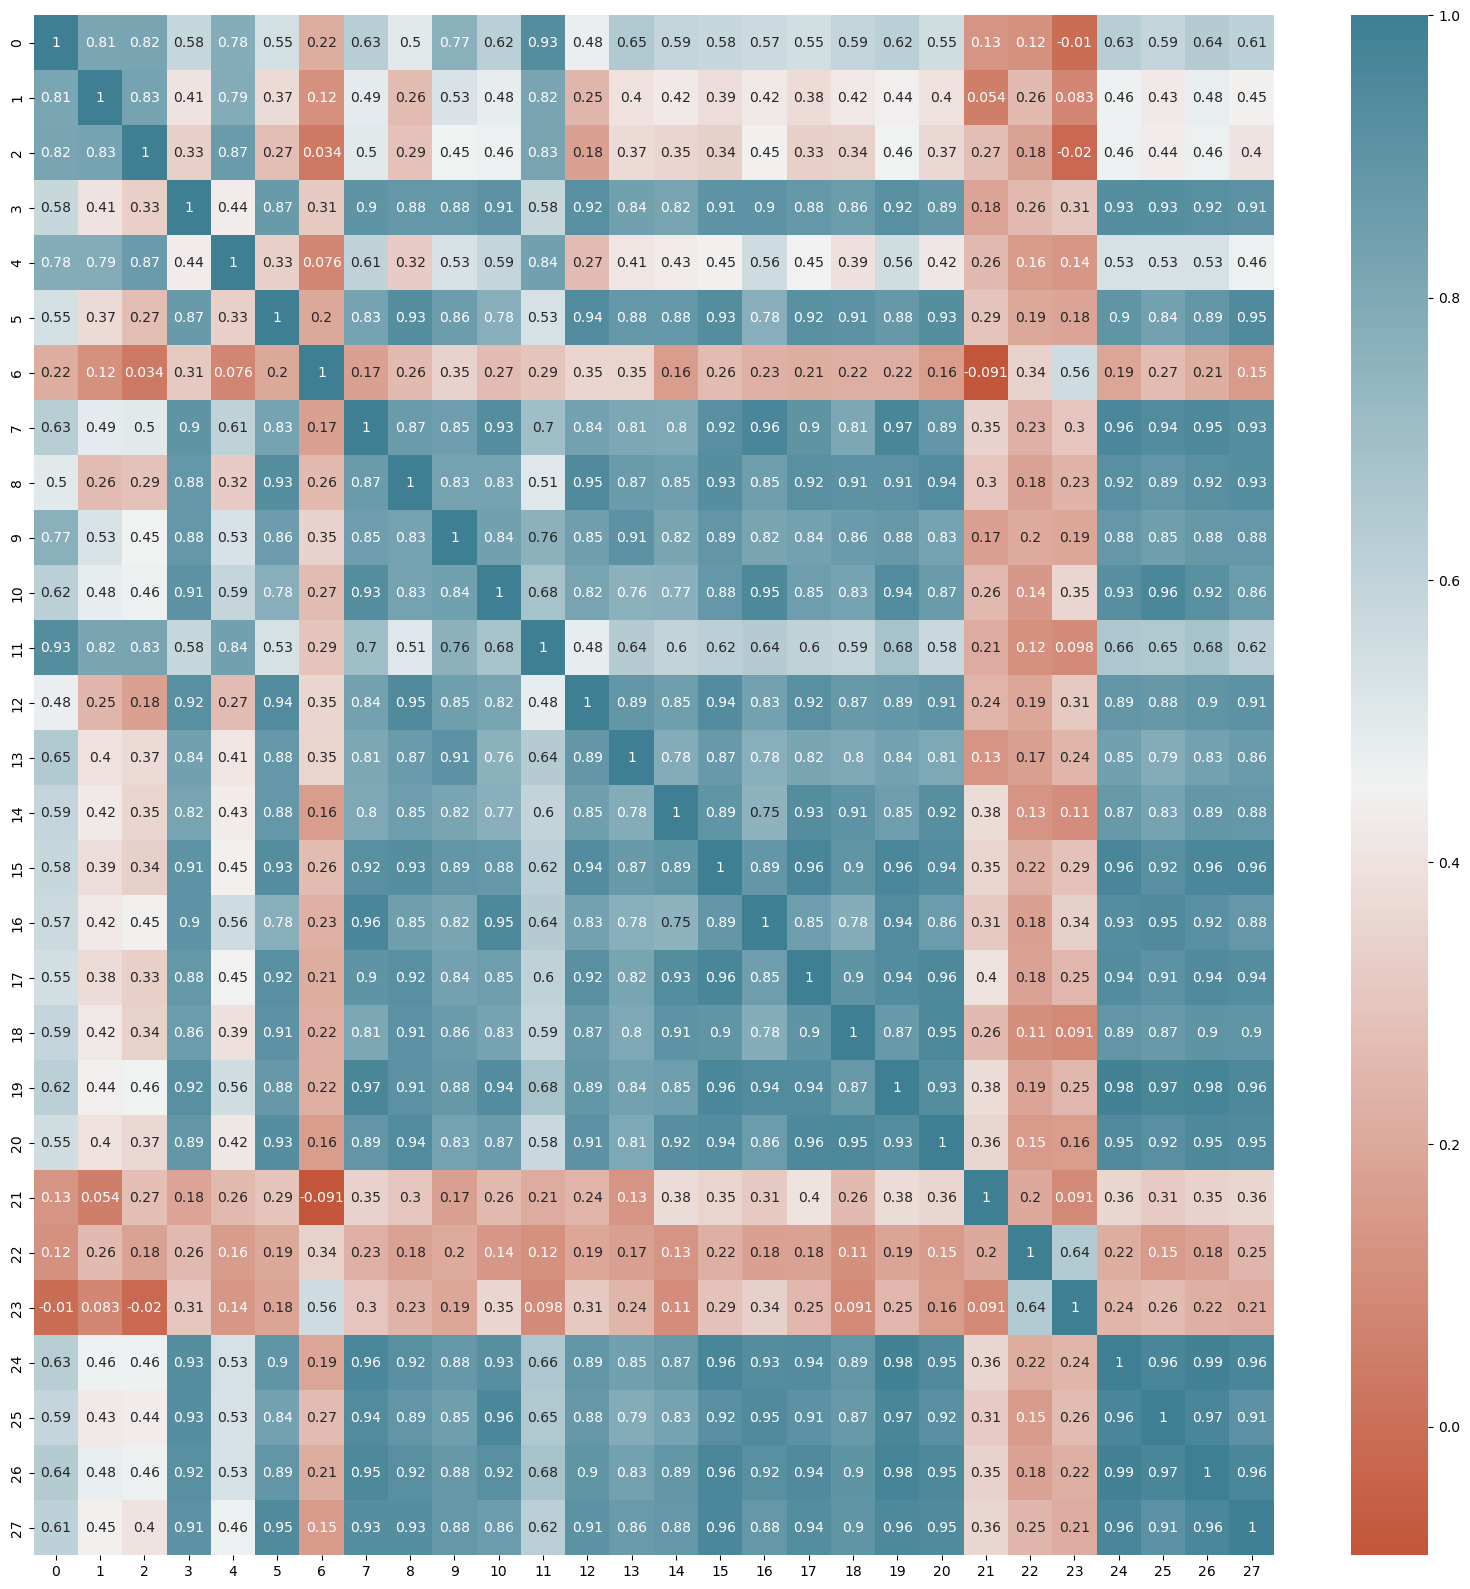

In [15]:
# Spearman correlation heatmap
corr_df = ppi.corr_coef
plt.figure(figsize=(20,20))
sns.heatmap(corr_df, annot=True, cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

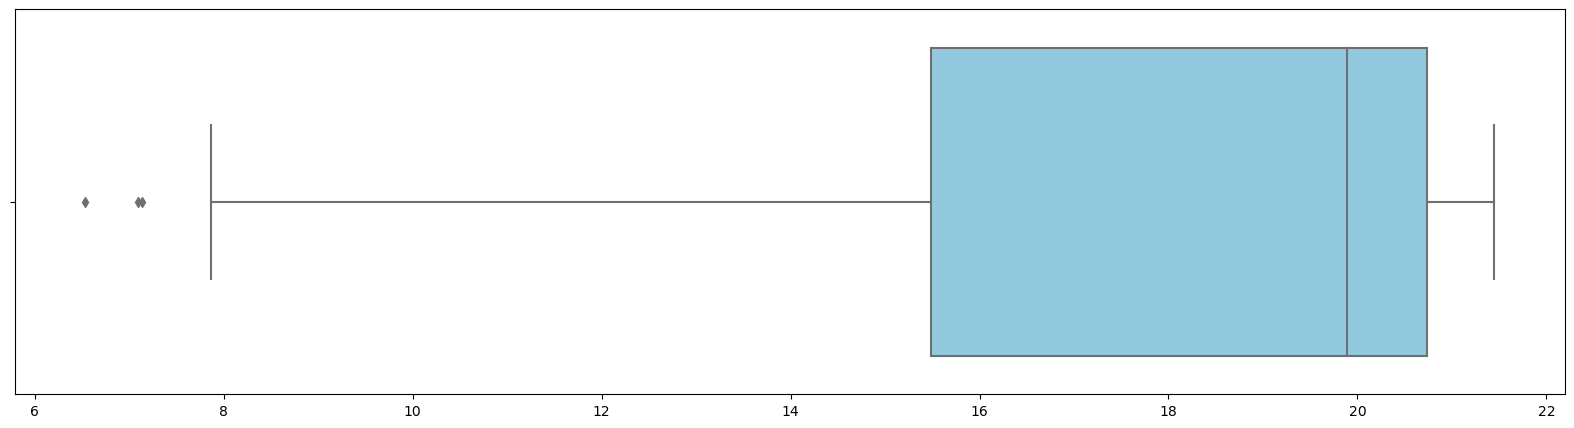

In [16]:
# plot boxplot of summmed correlation
plt.figure(figsize=(20, 5))
sns.boxplot(x=ppi.corr_coef_sum, color='skyblue')
# sns.violinplot(x=ppi.corr_coef_sum, inner="stick", color='skyblue')
plt.show()

In [17]:
list(ppi.corr_coef_sum)

[16.07550824549098,
 12.628409806234487,
 12.0682777422025,
 20.472212818203776,
 13.711516917701715,
 19.80602480549531,
 7.092208246036257,
 21.021481864036158,
 19.980338027074104,
 20.407957875306984,
 20.493561265042842,
 16.949772474151224,
 19.739119517341564,
 19.354688899249904,
 19.493503308243632,
 21.117299834604975,
 20.32614505904862,
 20.683074541523656,
 19.744173506535546,
 21.40176277184133,
 20.525264741577118,
 7.869459948647389,
 6.53563300988485,
 7.140606359793806,
 21.44956153645465,
 20.90463672002957,
 21.424360854620147,
 21.045312067938482]

# Estimate size

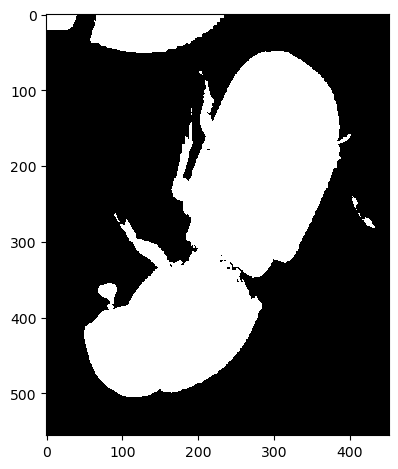

In [18]:
io.imshow(ppi.inv_bw_image_lst[15])

In [19]:
ppi.estimate_size(outlier_idx=ppi.outlier_idx, 
                          known_radius=1, 
                          canny_sigma=5)

E:\GIT_REPOS\LAB\Beetle_classifier\Segmentation\Ambrosia.py:268: RuntimeWarning: divide by zero encountered in divide
  area_ar = (np.array(px_count_lst)/circle_px_count)*circle_area
E:\GIT_REPOS\LAB\Beetle_classifier\Segmentation\Ambrosia.py:268: RuntimeWarning: invalid value encountered in divide
  area_ar = (np.array(px_count_lst)/circle_px_count)*circle_area


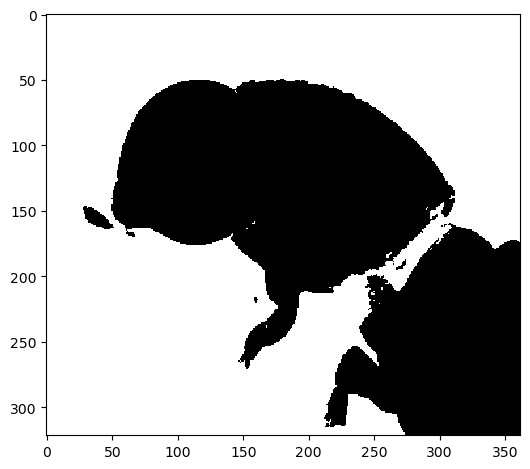

In [20]:
# print image detected as the outlier
io.imshow(ppi.outlier_bw_image)
plt.show()

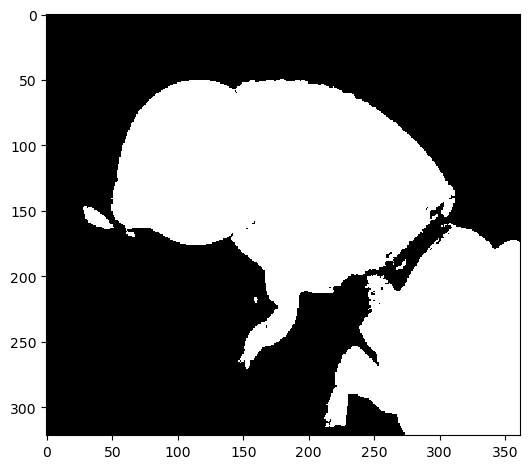

In [21]:
# print image detected as the outlier
bw_img = np.copy(ppi.inv_bw_image_lst[ppi.outlier_idx])
io.imshow(bw_img)
plt.show()

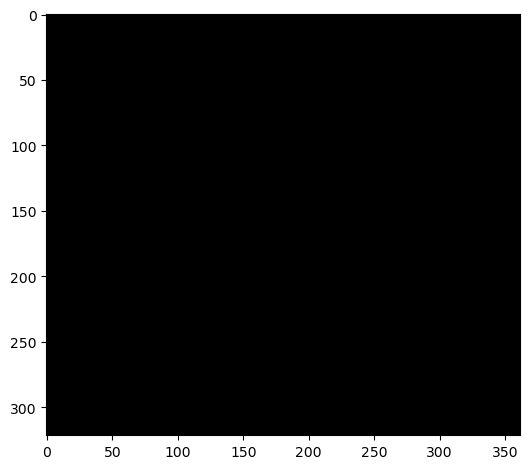

In [22]:
# print image detected as the outlier
io.imshow(ppi.clean_inv_bw_image_lst[ppi.outlier_idx])
plt.show()

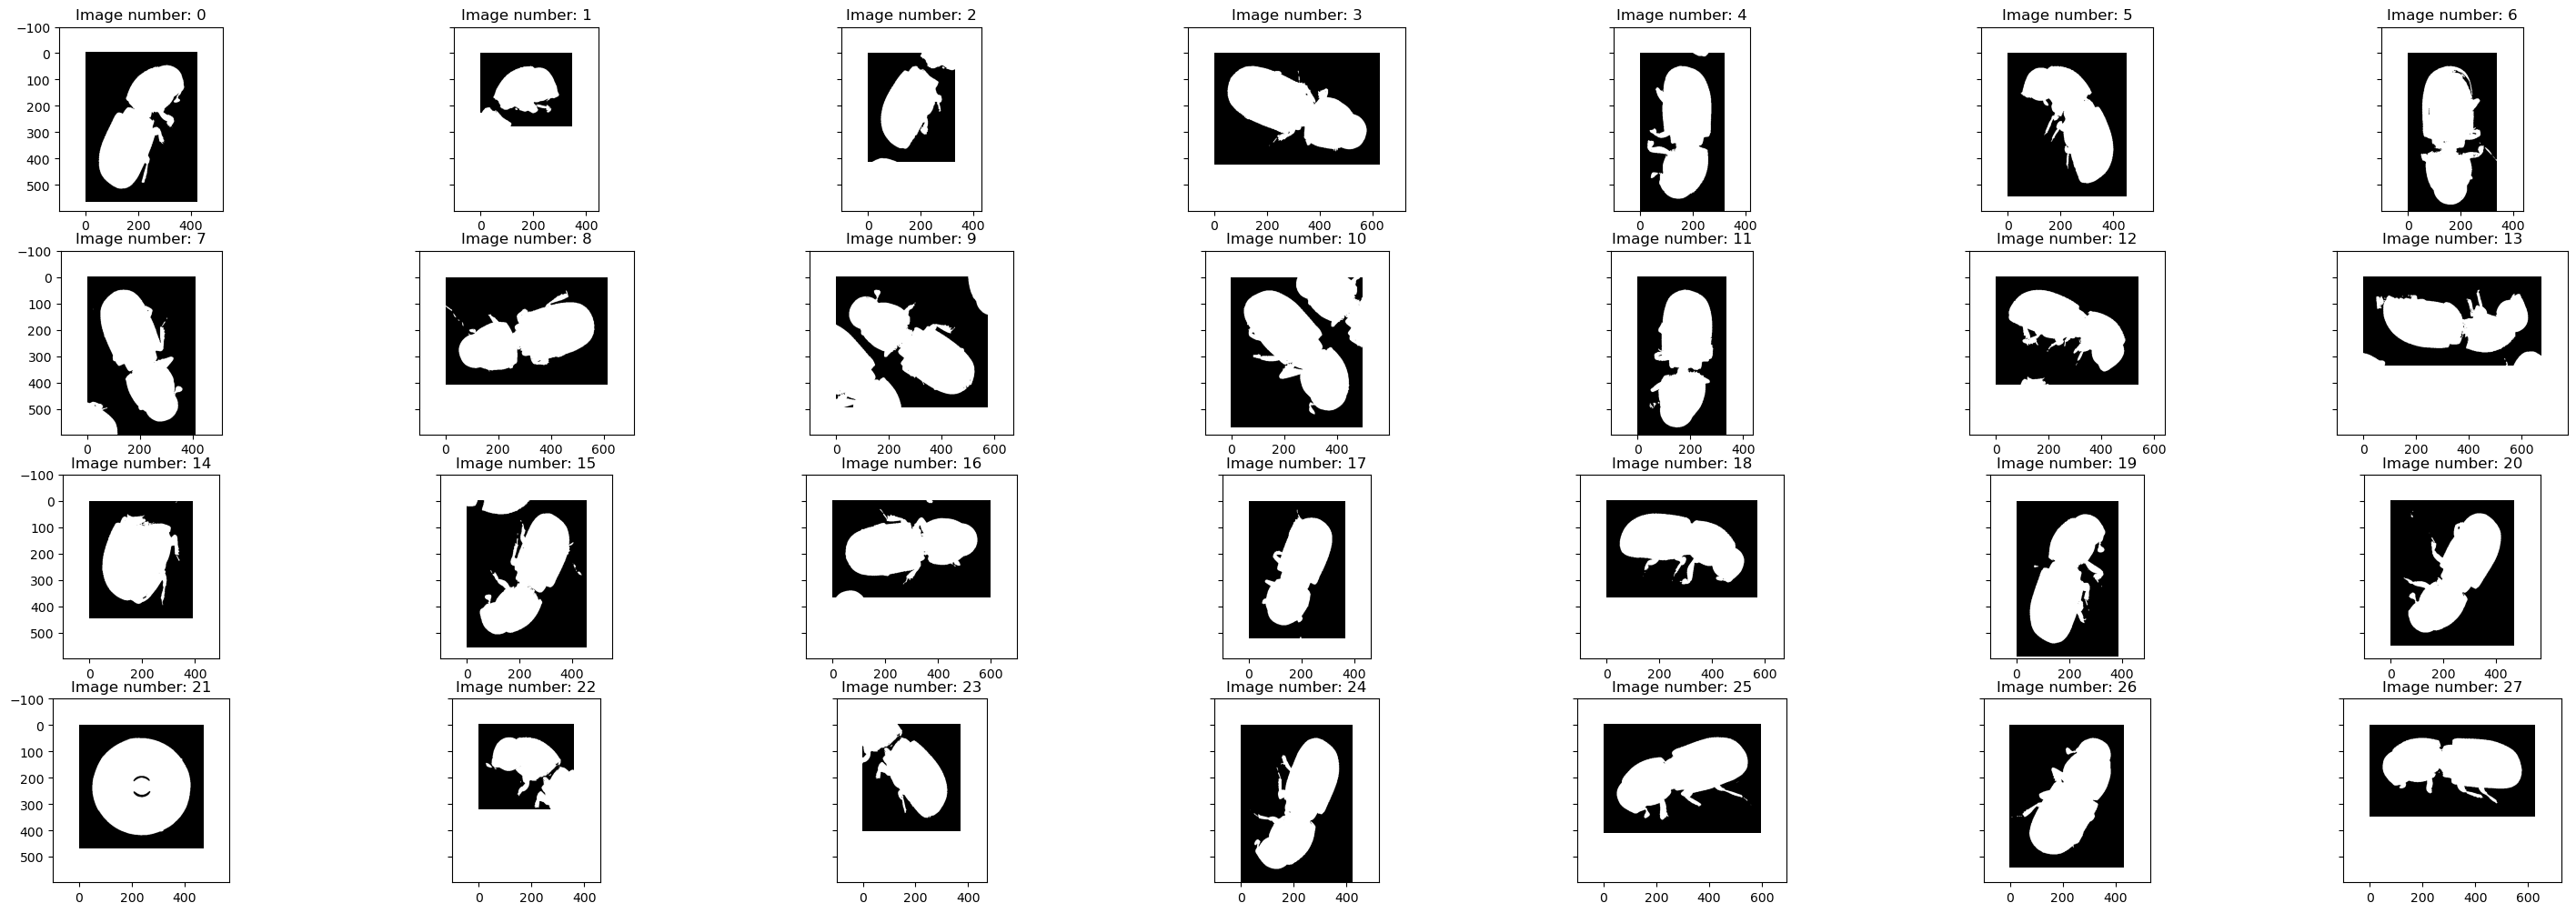

In [23]:
# define list of images
img_lst = ppi.inv_bw_image_lst

# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = axes[i][j].imshow(np.invert(img_lst[l]), cmap='Greys')
            axes[i][j].set_ylim(img_lst[l].shape[0]+ppi.image_edge_buffer*5, 0-ppi.image_edge_buffer*2)
            axes[i][j].set_xlim(0-ppi.image_edge_buffer*2, img_lst[l].shape[1]+ppi.image_edge_buffer*2)
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()

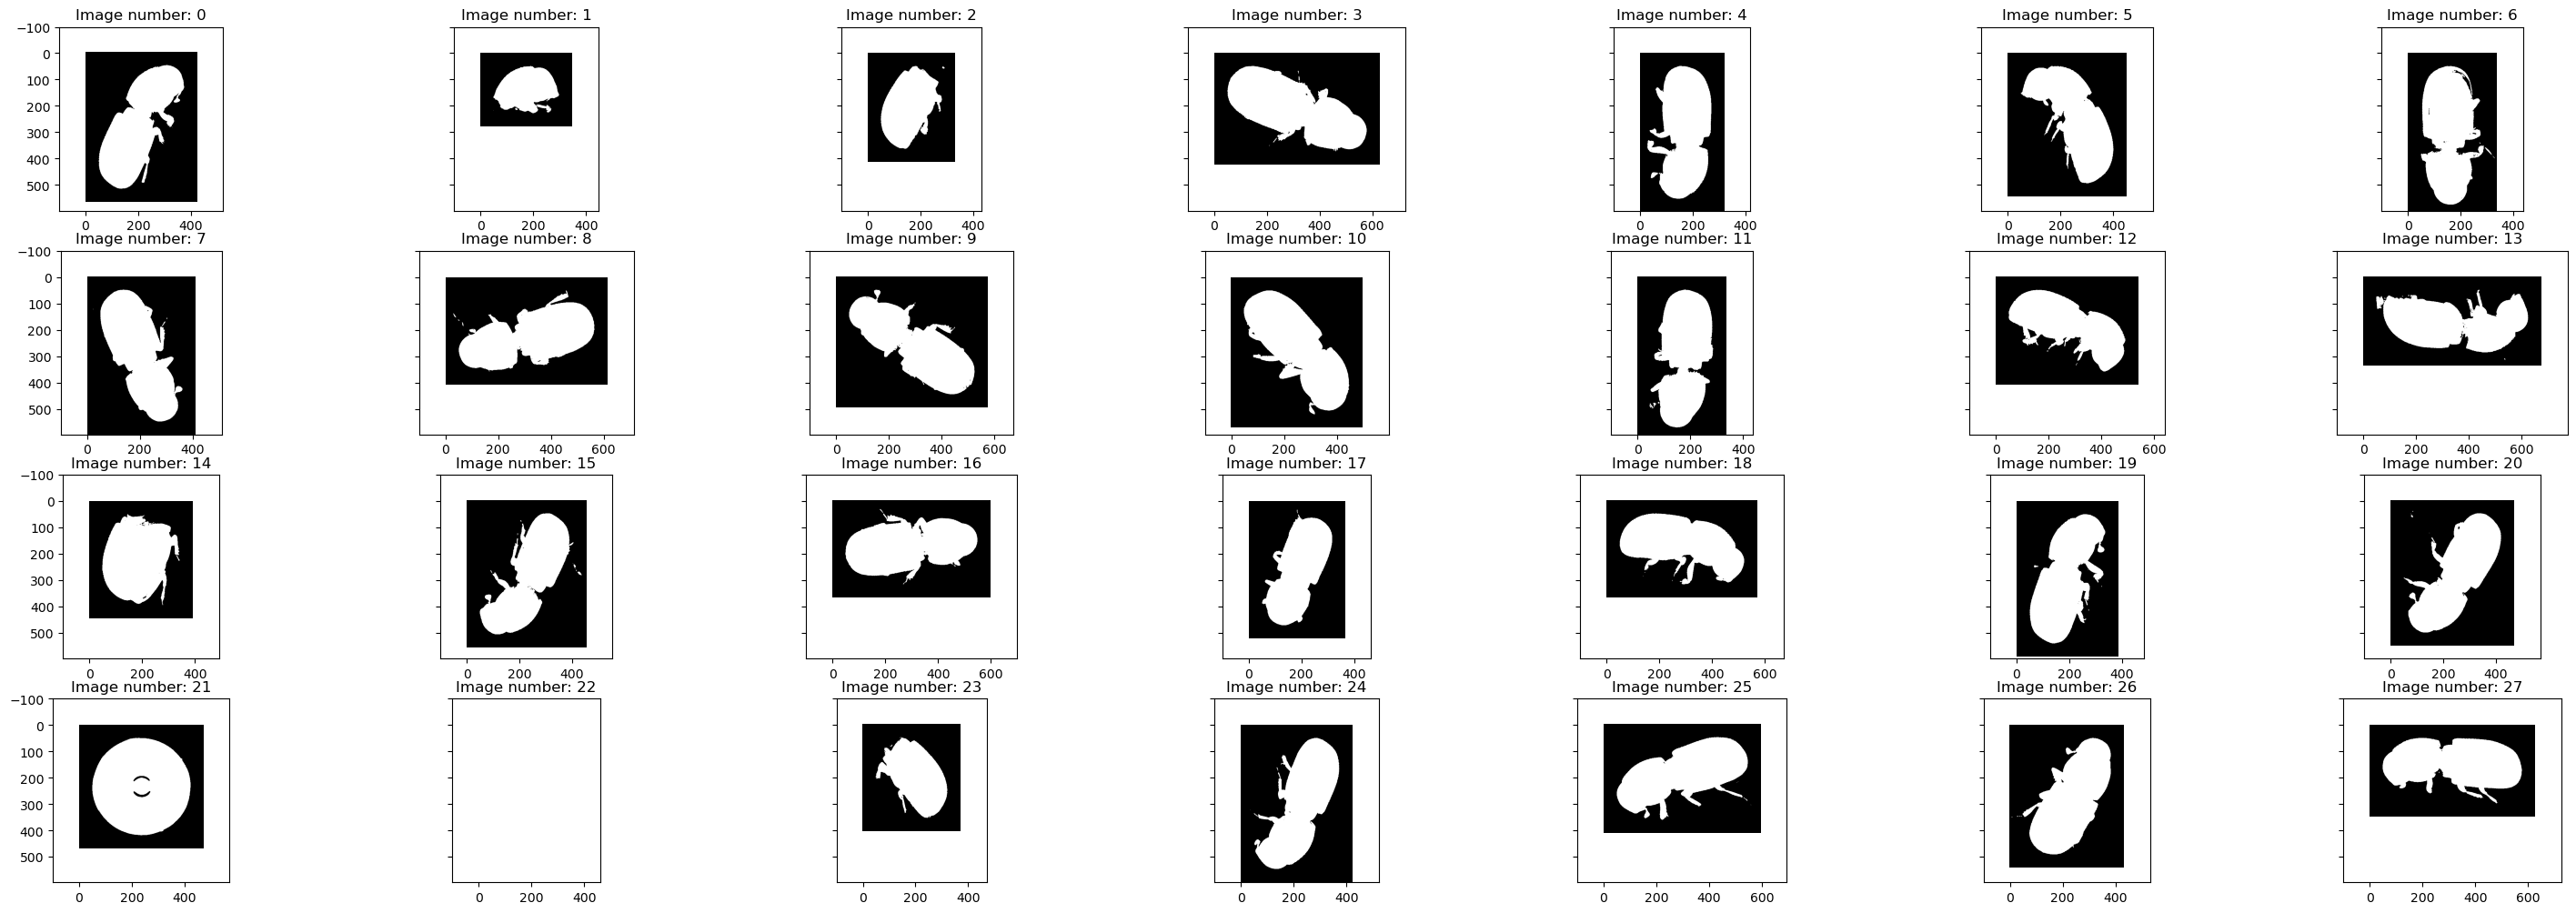

In [24]:
# define list of images
img_lst = ppi.clean_inv_bw_image_lst

# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = axes[i][j].imshow(np.invert(img_lst[l]), cmap='Greys')
            axes[i][j].set_ylim(img_lst[l].shape[0]+ppi.image_edge_buffer*5, 0-ppi.image_edge_buffer*2)
            axes[i][j].set_xlim(0-ppi.image_edge_buffer*2, img_lst[l].shape[1]+ppi.image_edge_buffer*2)
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()

In [25]:
ppi.image_selected_df

centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  orientation  \
0    571.173796  1247.637815     292    1048     858    1470    -0.462641   
1    743.126568   423.406033     606     249     883     597    -1.376875   
2    965.572119   255.107972     761      99    1175     430    -0.395553   
3   1029.939019  1465.640905     818    1163    1240    1789     1.175123   
4   1406.165224   165.605592    1111       0    1712     318    -0.042519   
5   1393.952813  2768.137933    1143    2516    1686    2965     0.512631   
6   1549.559950  1583.831079    1247    1428    1870    1765     0.021279   
7   1786.257347   499.642903    1495     301    2092     711     0.387453   
8   1766.752497  2079.601183    1542    1761    1949    2375    -1.302900   
9   1931.901447  1291.990626    1673     997    2168    1570     0.970029   
10  2057.837150  1051.873104    1790     800    2359    1297     0.685331   
11  2268.243810  2380.470787    1968    2204    2588    2540    -0.088486   
12  2498.884757  3099.687529    2313    2823    2721    3364     1.165048   
13  2670.922569   881.345675    2496     539    2832    1214     1.518501   
14  2857.637004  2981.301342    2641    2799    3085    3191    -0.283271   
15  3013.552024  1105.482158    2729     871    3285    1323    -0.501956   
16  3210.263688   298.411434    3038       9    3405     608    -1.437455   
17  3381.868222  3201.702637    3121    3015    3641    3380    -0.361940   
18  3431.869987  2153.767380    3266    1867    3633    2437     1.341705   
19  3577.999813   862.135859    3285     678    3874    1061    -0.324640   
20  3634.858849  2696.620795    3358    2446    3908    2914    -0.568293   
21  3816.298685  1312.193386    3582    1077    4051    1548     1.331163   
22  4068.796103   533.863714    3939     357    4261     719     1.382908   
23  4247.926516   719.376796    4049     519    4453     889     0.623854   
24  4466.244250  2097.089735    4167    1871    4762    2293    -0.390766   
25  4401.209080  1558.042957    4212    1260    4623    1854    -1.231700   
26  4750.764326  2435.869871    4472    2201    5012    2635    -0.505172   
27  4664.283595   500.883605    4516     180    4863     806     1.524337   

    axis_major_length  axis_minor_length  area  area_filled  kmeans_label  \
0          545.653254         197.796476   inf        77361             1   
1          237.863904         166.801444   inf        29972             1   
2          313.896116         190.389823   inf        45926             1   
3          587.354354         214.240668   inf        95341             1   
4          535.904018         205.977196   inf        79641             1   
5          523.653622         211.953133   inf        76674             1   
6          551.803410         205.606984   inf        82825             1   
7          555.112167         201.100717   inf        83867             1   
8          561.339649         209.639006   inf        85974             1   
9          576.610351         202.532999   inf        84891             1   
10         566.030115         220.173023   inf        92909             1   
11         558.324482         200.754089   inf        81268             1   
12         510.133981         196.003881   inf        70362             1   
13         617.577074         203.172727   inf        82979             1   
14         333.640442         267.231038   inf        68056             1   
15         549.414831         197.908971   inf        75937             1   
16         527.558468         205.854996   inf        81618             1   
17         457.857275         183.762014   inf        63343             1   
18         507.462413         210.188379   inf        75003             1   
19         541.425961         204.684803   inf        80146             1   
20         545.396632         203.015594   inf        79262             1   
21         372.372558         368.946345   inf       106833             1   
